In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
from scipy.optimize import curve_fit
import matplotlib as mpl
import decimal
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
mpl.rcParams['font.size'] = 16.
mpl.rcParams['axes.linewidth'] = 1.2

In [2]:
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
col=[ORANGE,SKY_BLUE,BLUE_GREEN,VERMILLION,RED_PURPLE]
st='-'
lt=4

('Total number of Life Sciences submissions: ', 32284.0)
('Total number of arXiv submissions: ', 1263265.0)


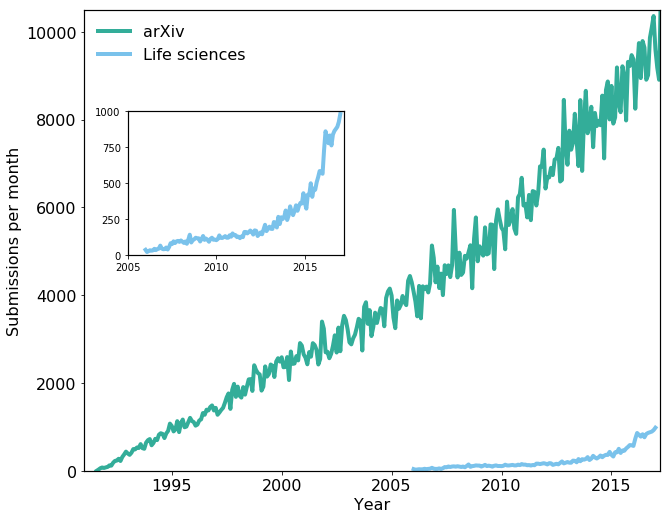

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.12, 0.12, 0.8, 0.8])
DATA='life_sciences.txt'
dat = loadtxt(DATA, unpack=True) # Read Life Sciences Data

## Order of the data is arXiv q-bio, Nature Precedings, F1000Research, PeerJ Preprints, bioRxiv, The Winnower, preprints.org, Wellcome Open Research
## First month is January 2006, last month is January 2017

t_start=2006 
t_end=2017 

n_lifesciences=dat.sum(axis=1, dtype='float') # Create array from sums of all submissions per month
t_lifesciences=np.arange(0,np.size(n_lifesciences),1) # Prepare time array 
t_lifesciences=t_start+t_lifesciences/12.0 # Transform year + month to fractional year



sum_lifesciences=np.sum(dat)
print('Total number of Life Sciences submissions: ',sum_lifesciences) # Total number of submissions in Life Sciences


ARXIV='arxiv.txt' # Read arXiv Data
arx = loadtxt(ARXIV, unpack=True)
t_arxiv=arx[0]+arx[1]/12. # Transform year + month to fractional year 
n_arxiv=arx[2]


sum_n_arxiv=np.sum(n_arxiv)
print('Total number of arXiv submissions: ',sum_n_arxiv)

## Plot 
ax.plot(t_arxiv,n_arxiv,linestyle=st,linewidth=4,color=col[2],alpha=0.8,label='arXiv')
ax.plot(t_lifesciences,n_lifesciences,linestyle=st,linewidth=4,color=col[1],alpha=0.8,label='Life sciences')
plt.ylim([0,10500])
plt.xlim([1991,2017.2])

## Axis, Range, Legend...
ax.set_xlabel("Year")
ax.set_ylabel('Submissions per month')
label=plt.legend(loc='best')
label.draw_frame(False)

## Add inset plot 
ax2 = inset_axes(ax, width=3, height=2,  loc=3, 
                 bbox_to_anchor=(0.17, 0.48), 
                 bbox_transform=ax.figure.transFigure) 
ax2.plot(t_lifesciences,n_lifesciences,linestyle=st,linewidth=4,color=col[1],alpha=0.8)
for label in ax2.xaxis.get_majorticklabels():
        label.set_fontsize(10)
for label in ax2.yaxis.get_majorticklabels():
        label.set_fontsize(10)

ax2.set_ylim([0,1000])
ax2.set_xlim([2005.0,2017.2])        

## Uncomment below to print to PDF 
#FILENAME = "preprint_inset.pdf"
#plt.savefig(FILENAME)

## Uncomment below to show plot
plt.show()
